In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt


In [3]:

# --- Step 1: Load and Prepare the PTBDB Data ---
print("--- Step 1: Loading and Preparing Data from Local PTBDB Files---")

# Load the two separate datasets
try:
    df_normal = pd.read_csv("ptbdb_normal.csv", header=None)
    df_abnormal = pd.read_csv("ptbdb_abnormal.csv", header=None)
    print("Files 'ptbdb_normal.csv' and 'ptbdb_abnormal.csv' loaded successfully.")
except FileNotFoundError:
    print("ERROR: Make sure both 'ptbdb_normal.csv' and 'ptbdb_abnormal.csv' are in the same folder as your script.")
    exit()




--- Step 1: Loading and Preparing Data from Local PTBDB Files---
Files 'ptbdb_normal.csv' and 'ptbdb_abnormal.csv' loaded successfully.


In [4]:
# Create labels for each dataset before combining them
# 0 = Normal
# 1 = Abnormal (Myocardial Infarction)
df_normal['label'] = 0
df_abnormal['label'] = 1

# Combine the two dataframes into a single one
df = pd.concat([df_normal, df_abnormal], ignore_index=True)

# Shuffle the combined dataset
# This is crucial because right now all the normal samples are first,
# followed by all the abnormal ones. The model would learn this order
# instead of the actual signal patterns.
df = shuffle(df, random_state=42)

# Separate features (X) and labels (y)
X = df.drop('label', axis=1).values
y = df['label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nData prepared successfully.")
print(f"Total samples: {len(df)}")
print(f"Shape of training features (X_train): {X_train.shape}")
print(f"Shape of testing features (X_test): {X_test.shape}")
print("-" * 30 + "\n")





Data prepared successfully.
Total samples: 14552
Shape of training features (X_train): (11641, 188)
Shape of testing features (X_test): (2911, 188)
------------------------------



In [5]:
# --- Step 2: Build the Binary Classification ANN Model ---
print("--- Step 2: Building the ANN Model for Binary Classification ---")

model = Sequential([
    # Input layer with 187 features
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    
    # Hidden layer
    Dense(32, activation='relu'),
    
    # Output layer for binary classification
    # - 1 neuron: Outputs a single value between 0 and 1
    # - 'sigmoid' activation: Perfect for binary (yes/no) probability
    Dense(1, activation='sigmoid')
])

# Compile the model for binary classification
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', # The standard loss function for binary problems
    metrics=['accuracy']
)

# Display the model's architecture
model.summary()
print("-" * 30 + "\n")


# --- Step 3: Train the Model ---
print("--- Step 3: Training the Model ---")
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=20,
    batch_size=128,
    verbose=1
)
print("Model training complete.")
print("-" * 30 + "\n")



--- Step 2: Building the ANN Model for Binary Classification ---


c:\Users\saura\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │        12,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,209 (55.50 KB)

 Trainable params: 14,209 (55.50 KB)

 Non-trainable params: 0 (0.00 B)

------------------------------

--- Step 3: Training the Model ---
Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8241 - loss: 0.4105 - val_accuracy: 0.9700 - val_loss: 0.1861
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9922 - loss: 0.0814 - val_accuracy: 0.9991 - val_loss: 0.0250
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9998 - loss: 0.0124 - val_accuracy: 1.0000 - val_loss: 0.0058
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.9618e-04 - val_accuracy: 1.0000 - val_loss: 6.4473e-04
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.5266e-04 - val_accuracy: 1.0000 - val_loss: 3.2956e-04
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━

--- Step 4: Evaluating Model and Visualizing Results ---
Test Accuracy: 100.00%
Test Loss: 0.0000


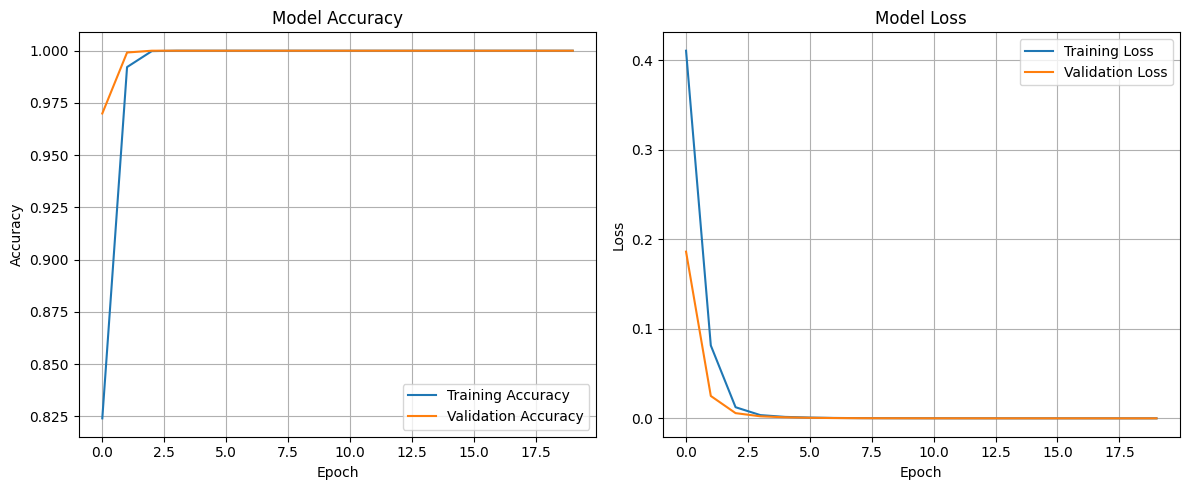

------------------------------



In [6]:

# --- Step 4: Evaluate the Model and Visualize Results ---
print("--- Step 4: Evaluating Model and Visualizing Results ---")

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

# Plotting Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
print("-" * 30 + "\n")




In [7]:
# --- Step 5: Test the Model with a Live ECG Signal ---
print("--- Step 5: Live Test with a Sample Signal ---")

# Define the class names for interpretation
CLASS_NAMES = {
    0: 'Normal',
    1: 'Abnormal (Myocardial Infarction Detected)'
}

# Example: Take a sample from the test set to simulate a live signal
sample_signal = X_test[5] # You can change the index to test other signals

# Reshape for the model
sample_signal_reshaped = np.reshape(sample_signal, (1, X_train.shape[1]))

# Make a prediction
# The output will be a single number (the probability of being 'Abnormal')
prediction_prob = model.predict(sample_signal_reshaped)[0][0]

# Use a 0.5 threshold to decide the final class
predicted_class_index = 1 if prediction_prob > 0.5 else 0
predicted_class_name = CLASS_NAMES[predicted_class_index]

print(f"Sample Signal Input (first 10 values): {sample_signal[:10]}...")
print(f"\nModel Output (Probability of being Abnormal): {prediction_prob:.4f}")
print(f"Prediction Threshold: 0.5")
print(f"\nFinal Predicted Class: {predicted_class_name}")
print("-" * 30 + "\n")

--- Step 5: Live Test with a Sample Signal ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Sample Signal Input (first 10 values): [1.         0.72047246 0.4507874  0.06889763 0.06003937 0.0718504
 0.1496063  0.1456693  0.11318897 0.11318897]...

Model Output (Probability of being Abnormal): 1.0000
Prediction Threshold: 0.5

Final Predicted Class: Abnormal (Myocardial Infarction Detected)
------------------------------

